[View in Colaboratory](https://colab.research.google.com/github/Nourahussein/Plant-seedling-classification/blob/master/FINAL_seedling.ipynb)

**step1:** Download data from [kaggle](https://www.kaggle.com/c/plant-seedlings-classification)  in train.zip file 

**step 2 :**  extract files and see its contents

You have to update this link if you use this notebook 

In [0]:
url="https://storage.googleapis.com/kaggle-competitions-data/kaggle/7880/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528475319&Signature=SIeaOWGEx2yqe0PI9cTwCB6pb0I5b8573kM%2Bd4ahhTu7tASHNDiyqyqDVyhut%2FnUK2Vlu7hI20yjzslvZAZFqCkelG%2Bdd6dptYA1Lt0siFV%2BqW5ESXFI5UHe4Zgj62LKSiZusN%2FmPSW8%2B%2B%2BxjFyLLGYPj%2FQ0Nhj8iA4ja18DINQQQw8zLePyVl7GruPU5YZt0cMrxCDM0dANgTmX2DP%2BK5yAfBWdgHjNRN2c%2FY%2Bi5ZsgjGt1dDyqgNjnJUODIGzfOShd8HVTWeW0yxzlfEYQi3eI0cnkTsUof9MHgtQBerR%2FvDs5UvyGpXQym4YYzidXjXklmit1b5kneQECZCHenw%3D%3D"

In [5]:
from urllib import request
file_name = "train.zip"
request.urlretrieve(url, file_name)

('train.zip', <http.client.HTTPMessage at 0x7efee0762f98>)

# **Unziping train file**

In [6]:
import zipfile as zf
train_zip = zf.ZipFile(file_name)
train_zip.extractall()
!ls

datalab  train	train.zip


show the dirctoris in train

In [7]:
#see contents of train file
!ls train


Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


In [0]:
#change dirctory 
#import os 
#os.chdir("train")
#cwd = os.getcwd()


In [0]:
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns


In [0]:
#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "train"

 **Read images and remove missing values** 
 save images in **images** list

In [0]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
        
        

number of all images

In [11]:
len(images)

4750

**resizing images**

In [0]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res
#resized=[]
#for image in images:
#  ressized= resize_images(images[image])

In [0]:
#save resized images into images.
images = [resize_images(img) for img in images]

In [14]:
images[0].shape

(256, 256, 3)

#number of images in each class 

In [15]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))
        
  


images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Sugar beet images is  -> 385
number of Loose Silky-bent images is  -> 654
number of Charlock images is  -> 390
number of Shepherds Purse images is  -> 231
number of Maize images is  -> 221
number of Common wheat images is  -> 221
number of Cleavers images is  -> 287
number of Small-flowered Cranesbill images is  -> 496
number of Black-grass images is  -> 263
number of Common Chickweed images is  -> 611
number of Fat Hen images is  -> 475
number of Scentless Mayweed images is  -> 516


# plot the distrbution of number of images

Text(0.5,0.98,'Categorical Plotting')

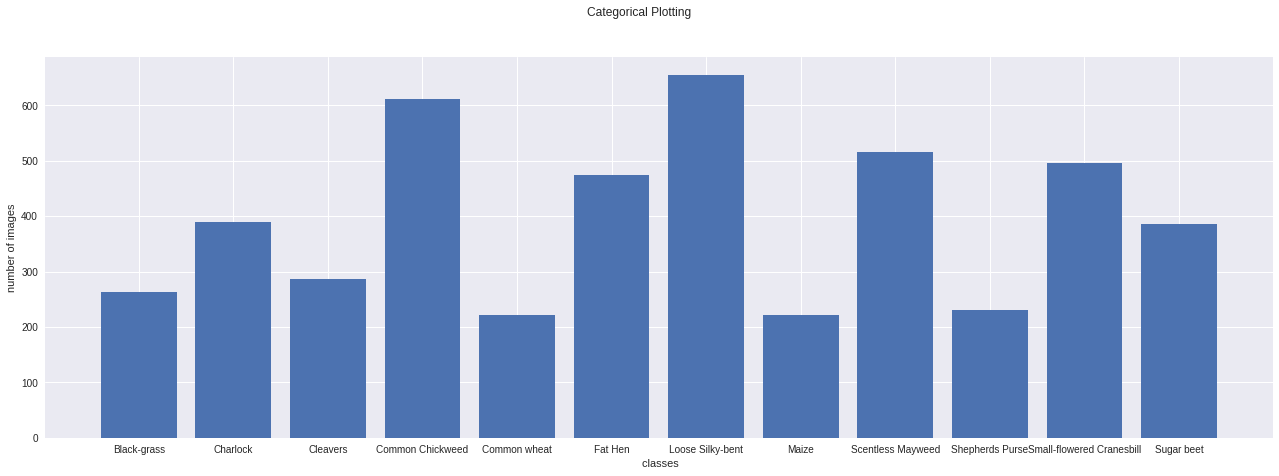

In [16]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

# look at image after resize

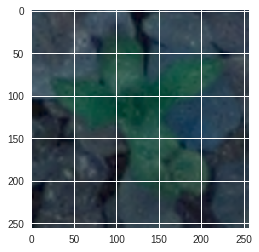

In [17]:
plt.imshow(images[50])


# data Exploration  

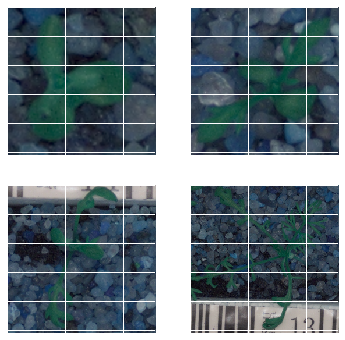

In [18]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

In [0]:
#!ls "train/Scentless Mayweed" 1300c3cd9.png

img = cv2.imread("train/Scentless Mayweed/1300c3cd9.png")


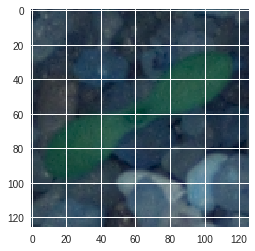

In [20]:
plt.imshow(img)

#Apply image processing on the images 
* convert image from RGB to HSV 
* Apply closing opration(one of mophological opration)
* Apply segmentation 
* Apply sharpening 

In [0]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp



# put all those functions together.

In [0]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

# itrate on all images

In [0]:
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue
      
    
  

# plot sample image to see diffrence before and after

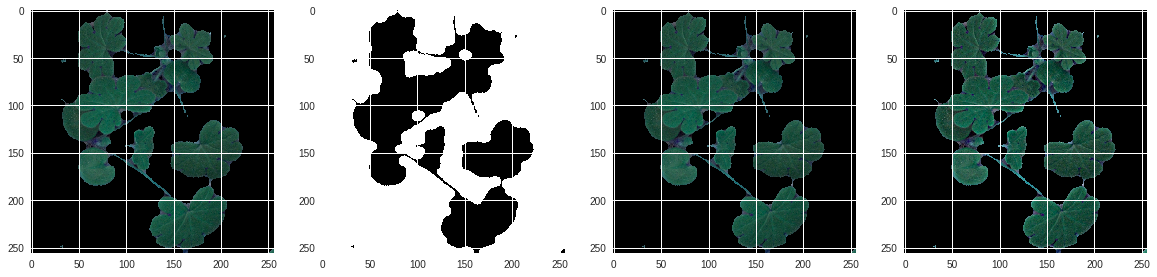

In [24]:
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

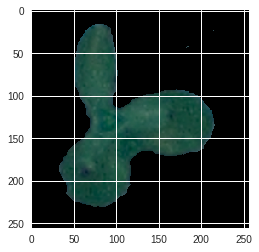

In [25]:
plt.imshow(images[0])

In [26]:
images.shape

(4750, 256, 256, 3)

# Label encoder 

In [0]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [28]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# Spliting data into training and testing set
* training set : 70%

*  testing set: 30% 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

In [30]:
X_train.shape


(3325, 256, 256, 3)

# Create validarion set 
* split test data into 50% test, 50% validation

In [0]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [32]:
print(X_test.shape)
print(X_val.shape)

(712, 256, 256, 3)
(713, 256, 256, 3)



# CNN MODEL 


In [33]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [0]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [35]:
# I'm using colab for good resaon  :D 
# I put epochs = 50 and I waited until it reach a acceptable accuracy for me then I stopped the training at this point.
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

Train on 3325 samples, validate on 713 samples
Epoch 1/50
3325/3325 [==============================] - 57s 17ms/step - loss: 2.8650 - acc: 0.1191 - val_loss: 2.4123 - val_acc: 0.1150
Epoch 2/50
3325/3325 [==============================] - 48s 15ms/step - loss: 2.2914 - acc: 0.2093 - val_loss: 2.1352 - val_acc: 0.2763
Epoch 3/50
3325/3325 [==============================] - 48s 15ms/step - loss: 2.0974 - acc: 0.2478 - val_loss: 2.0994 - val_acc: 0.2903
Epoch 4/50
 736/3325 [=====>........................] - ETA: 34s - loss: 2.0043 - acc: 0.2758

3325/3325 [==============================] - 48s 15ms/step - loss: 2.0079 - acc: 0.2827 - val_loss: 1.9492 - val_acc: 0.3380
Epoch 5/50
3325/3325 [==============================] - 48s 15ms/step - loss: 1.9302 - acc: 0.3041 - val_loss: 1.8880 - val_acc: 0.3633
Epoch 6/50
3325/3325 [==============================] - 48s 15ms/step - loss: 1.8151 - acc: 0.3510 - val_loss: 1.8376 - val_acc: 0.3787
Epoch 7/50
2144/3325 [==================>...........] - ETA: 15s - loss: 1.6915 - acc: 0.3890

3325/3325 [==============================] - 48s 15ms/step - loss: 1.7101 - acc: 0.3892 - val_loss: 1.7423 - val_acc: 0.4053
Epoch 8/50
3325/3325 [==============================] - 48s 15ms/step - loss: 1.5962 - acc: 0.4469 - val_loss: 1.5556 - val_acc: 0.4558
Epoch 9/50
3325/3325 [==============================] - 48s 15ms/step - loss: 1.5016 - acc: 0.4731 - val_loss: 1.4254 - val_acc: 0.4937
Epoch 10/50
2368/3325 [====================>.........] - ETA: 12s - loss: 1.4142 - acc: 0.5169

3325/3325 [==============================] - 48s 15ms/step - loss: 1.4062 - acc: 0.5137 - val_loss: 1.3706 - val_acc: 0.5498
Epoch 11/50
3325/3325 [==============================] - 48s 15ms/step - loss: 1.2820 - acc: 0.5519 - val_loss: 1.2768 - val_acc: 0.5470
Epoch 12/50
3325/3325 [==============================] - 48s 15ms/step - loss: 1.1839 - acc: 0.5895 - val_loss: 1.2668 - val_acc: 0.5975
Epoch 13/50
2368/3325 [====================>.........] - ETA: 12s - loss: 1.0767 - acc: 0.6326

3325/3325 [==============================] - 48s 15ms/step - loss: 1.1086 - acc: 0.6250 - val_loss: 1.0976 - val_acc: 0.6508
Epoch 14/50
3325/3325 [==============================] - 48s 15ms/step - loss: 1.0350 - acc: 0.6364 - val_loss: 1.1583 - val_acc: 0.6690
Epoch 15/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.9876 - acc: 0.6617 - val_loss: 1.0074 - val_acc: 0.6606
Epoch 16/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.9350 - acc: 0.6930

3325/3325 [==============================] - 48s 15ms/step - loss: 0.9444 - acc: 0.6872 - val_loss: 1.1538 - val_acc: 0.6255
Epoch 17/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.8766 - acc: 0.6875 - val_loss: 1.0019 - val_acc: 0.7013
Epoch 18/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.8618 - acc: 0.7134 - val_loss: 0.9522 - val_acc: 0.6957
Epoch 19/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.8169 - acc: 0.7289

3325/3325 [==============================] - 48s 15ms/step - loss: 0.8076 - acc: 0.7296 - val_loss: 0.9780 - val_acc: 0.6802
Epoch 20/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.7660 - acc: 0.7392 - val_loss: 0.9427 - val_acc: 0.6816
Epoch 21/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.7796 - acc: 0.7398 - val_loss: 0.8303 - val_acc: 0.7251
Epoch 22/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.7332 - acc: 0.7496

3325/3325 [==============================] - 48s 15ms/step - loss: 0.7347 - acc: 0.7474 - val_loss: 0.8029 - val_acc: 0.7265
Epoch 23/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.7157 - acc: 0.7504 - val_loss: 0.8931 - val_acc: 0.6914
Epoch 24/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.6825 - acc: 0.7636 - val_loss: 0.8744 - val_acc: 0.7041
Epoch 25/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.6914 - acc: 0.7711

3325/3325 [==============================] - 48s 15ms/step - loss: 0.7012 - acc: 0.7609 - val_loss: 0.9016 - val_acc: 0.6971
Epoch 26/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.6424 - acc: 0.7723 - val_loss: 0.8109 - val_acc: 0.7307
Epoch 27/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.6355 - acc: 0.7717 - val_loss: 0.6699 - val_acc: 0.8022
Epoch 28/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.6182 - acc: 0.7897

3325/3325 [==============================] - 48s 15ms/step - loss: 0.6096 - acc: 0.7904 - val_loss: 0.6891 - val_acc: 0.7546
Epoch 29/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.6176 - acc: 0.7907 - val_loss: 0.6890 - val_acc: 0.7574
Epoch 30/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.5973 - acc: 0.7970 - val_loss: 0.8479 - val_acc: 0.7027
Epoch 31/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.5597 - acc: 0.8062

3325/3325 [==============================] - 48s 15ms/step - loss: 0.5606 - acc: 0.8036 - val_loss: 0.7112 - val_acc: 0.7658
Epoch 32/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.5558 - acc: 0.8159 - val_loss: 0.8844 - val_acc: 0.7251
Epoch 33/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.5585 - acc: 0.8072 - val_loss: 0.7389 - val_acc: 0.7602
Epoch 34/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.5691 - acc: 0.8024

3325/3325 [==============================] - 48s 15ms/step - loss: 0.5657 - acc: 0.8024 - val_loss: 0.7067 - val_acc: 0.7798
Epoch 35/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.5669 - acc: 0.8042 - val_loss: 0.6674 - val_acc: 0.7826
Epoch 36/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.5422 - acc: 0.8135 - val_loss: 0.6605 - val_acc: 0.8008
Epoch 37/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.4961 - acc: 0.8235

3325/3325 [==============================] - 48s 15ms/step - loss: 0.5170 - acc: 0.8202 - val_loss: 0.6979 - val_acc: 0.7616
Epoch 38/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.5425 - acc: 0.8162 - val_loss: 0.6156 - val_acc: 0.7826
Epoch 39/50
3325/3325 [==============================] - 48s 15ms/step - loss: 0.5149 - acc: 0.8235 - val_loss: 0.6210 - val_acc: 0.7994
Epoch 40/50
2368/3325 [====================>.........] - ETA: 12s - loss: 0.5054 - acc: 0.8349

2624/3325 [======================>.......] - ETA: 9s - loss: 0.5167 - acc: 0.8300

KeyboardInterrupt: ignored

In [36]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4884490830342421
Test accuracy: 0.8258427041635085


In [37]:
X_test.shape

(712, 256, 256, 3)

In [0]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

# **Data augmentation **

In [0]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [40]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 72s - loss: 0.6092 - acc: 0.7949 - val_loss: 0.7028 - val_acc: 0.7574
Epoch 2/30
 - 69s - loss: 0.6448 - acc: 0.7880 - val_loss: 0.6795 - val_acc: 0.7756
Epoch 3/30
 - 69s - loss: 0.6203 - acc: 0.7979 - val_loss: 0.8742 - val_acc: 0.7125
Epoch 4/30
 - 68s - loss: 0.6012 - acc: 0.8028 - val_loss: 0.6659 - val_acc: 0.7658
Epoch 5/30
 - 69s - loss: 0.5903 - acc: 0.8031 - val_loss: 0.6246 - val_acc: 0.8050
Epoch 6/30
 - 68s - loss: 0.5718 - acc: 0.8103 - val_loss: 1.0529 - val_acc: 0.6900
Epoch 7/30
 - 68s - loss: 0.5959 - acc: 0.8010 - val_loss: 0.8523 - val_acc: 0.7363
Epoch 8/30
 - 67s - loss: 0.5522 - acc: 0.8082 - val_loss: 0.6495 - val_acc: 0.8065
Epoch 9/30
 - 67s - loss: 0.5464 - acc: 0.8170 - val_loss: 0.6561 - val_acc: 0.7882
Epoch 10/30
 - 67s - loss: 0.6143 - acc: 0.7955 - val_loss: 0.5461 - val_acc: 0.8275
Epoch 11/30
 - 67s - loss: 0.5469 - acc: 0.8161 - val_loss: 0.7033 - val_acc: 0.7644
Epoch 12/30
 - 66s - loss: 0.5636 - acc: 0.8146 - val_loss: 0.6734 - val_a

In [41]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.4506817952300725
Test accuracy: 0.8398876404494382


# Model Evaluation

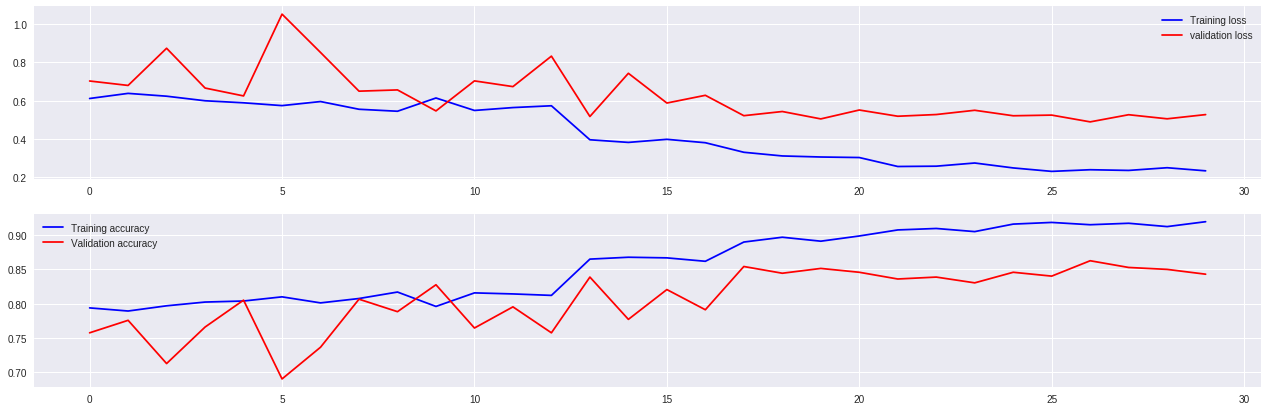

In [42]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
#prediction = model.predict(X_test)

# Confusion Matrix

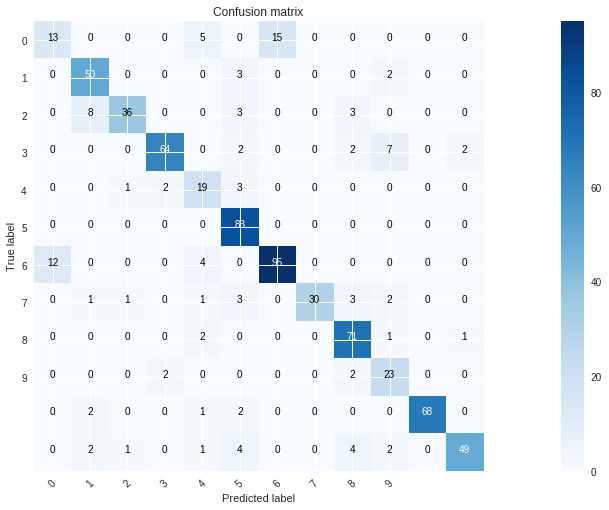

In [45]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [0]:
Predicted_classes = model.predict_classes(X_test)


In [0]:
wrong_preds = X_test[Predicted_classes != np.argmax(y_test)]

In [48]:
set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [0]:
i = 10

Predicted class: Fat Hen
Actual class: Cleavers


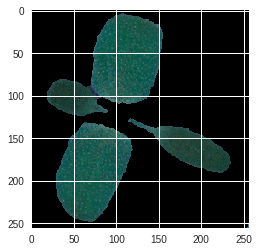

In [50]:
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])

In [51]:
enc.inverse_transform(np.array([y_test[10]]))

array(['Cleavers'], dtype='<U25')

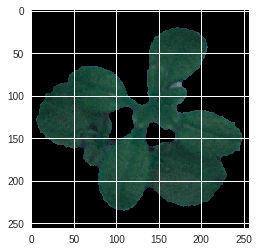

In [52]:
plt.imshow(X_test[10])

In [53]:
enc.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')